# **Count of Participants by Sport**

In [ ]:
# 1. Identifying popular and profitable sports for the leisure centre

import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_olympics = pd.read_csv('clean_olympics_dataset.csv')

# 1a.Count of participants (NOC) by sport

count_of_participants = data_olympics.groupby('Sport')['NOC'].count()
df_count_part = count_of_participants.to_frame()
df_count_part

,NOC
Sport,
3X3 BASKETBALL,64
ALPINE SKIING,2347
ALPINISM,7
ARCHERY,847
ART COMPETITIONS,593
...,...
TUG-OF-WAR,37
VOLLEYBALL,1081
WATER POLO,1316


# **Count of Medals by Sport**

In [ ]:
# 1b.Count of medals by sport
count_of_medals = data_olympics.groupby(['Sport','Medal']).size()
df_count_medals = count_of_medals.unstack(fill_value=0)
# Uisng unstack() function to create columns for each medal type
df_count_medals

Medal,BRONZE,GOLD,NONE,SILVER
Sport,,,,
3X3 BASKETBALL,8,8,40,8
ALPINE SKIING,28,32,2258,29
ALPINISM,0,7,0,0
ARCHERY,31,42,727,47
ART COMPETITIONS,9,10,561,13
...,...,...,...,...
TUG-OF-WAR,5,8,16,8
VOLLEYBALL,93,88,804,96
WATER POLO,117,125,950,124


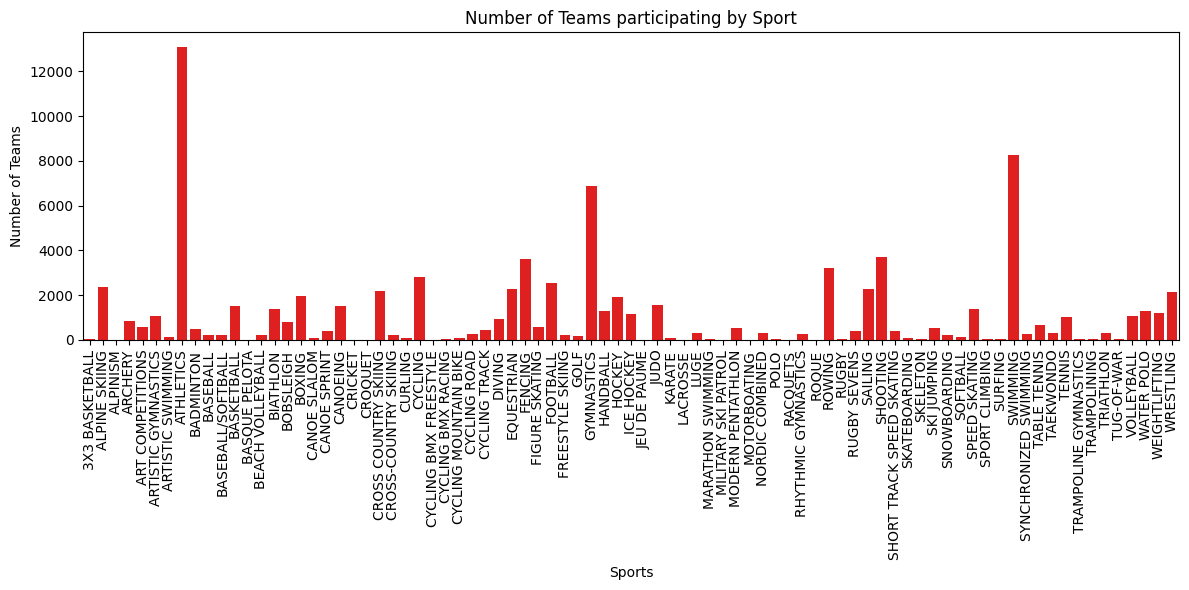

In [ ]:
# 1a.Count of participants (NOC) by sport -Visualisation
plt.figure(figsize=(12,6))
sns.countplot(data=data_olympics, x='Sport',order=count_of_participants.index, color='red')
plt.title('Number of Teams participating by Sport')
plt.xlabel('Sports')
plt.ylabel('Number of Teams')
plt.xticks(rotation=90)
plt.tight_layout()
# or plt.subplots_adjust(bottom=0.10)
plt.show()

# **Instal Scikit Library**

In [ ]:
pip install scikit-learn

# **Clustering of Olympic Sports**

C:\Users\gsaps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               Sport  Medal_Count  Athletes  Cluster
0     3X3 BASKETBALL           64        64        0
1      ALPINE SKIING         2347       737        1
2           ALPINISM            7         7        0
3            ARCHERY          847       406        0
4   ART COMPETITIONS          593       485        0
..               ...          ...       ...      ...
78        TUG-OF-WAR           37        35        0
79        VOLLEYBALL         1081       857        0
80        WATER POLO         1316       971        0
81     WEIGHTLIFTING         1216       937        0
82         WRESTLING         2126      1571        1

[83 rows x 4 columns]


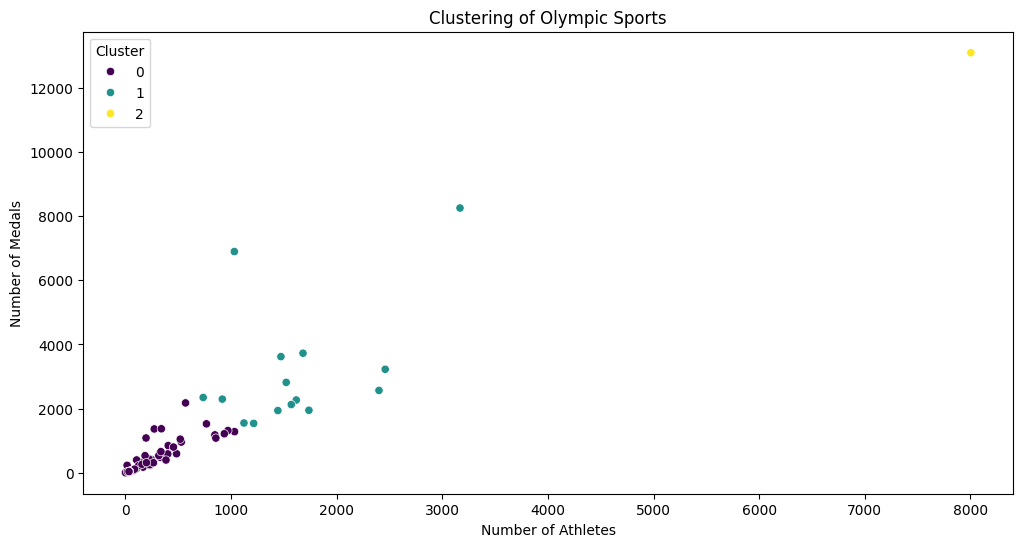

In [ ]:
# 1c.Clustering

# Import two classes from the library SciKit
from sklearn.preprocessing import StandardScaler # Standarise the dataset
from sklearn.cluster import KMeans # To perform K-mean clustering

# Aggregate Data by Sport

sport_summary = data_olympics.groupby('Sport').agg({'Medal':'count'}).reset_index() # reseting the index so that we use the Medal_count as a regular column
sport_summary.rename(columns={'Medal':'Medal_Count'}, inplace=True)

athlete_counts = data_olympics.groupby('Sport')['Name'].nunique().reset_index()
athlete_counts.rename(columns={'Name':'Athletes'}, inplace=True)

# Merge the counts into the sport_summary DataFrame

sport_summary = pd.merge(sport_summary,athlete_counts, on='Sport')

# Standardise features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(sport_summary[['Athletes', 'Medal_Count']])

# Clustering

kmeans = KMeans(n_clusters=3, random_state=0) # We have 3 clusters and the random state set to 0 means that we will get the same results every time we run the code
clusters = kmeans.fit_predict(scaled_features)
sport_summary['Cluster'] = clusters

print(sport_summary)

# Visualisation

plt.figure(figsize=(12,6))
sns.scatterplot(data=sport_summary, x='Athletes', y='Medal_Count', hue='Cluster', palette= 'viridis')
plt.title('Clustering of Olympic Sports')
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.legend(title='Cluster')
plt.show()

# **Regression Analysis for the 3 most popular sports**

Root Mean Square Error (RMSE) of our model is 28.049947987897692


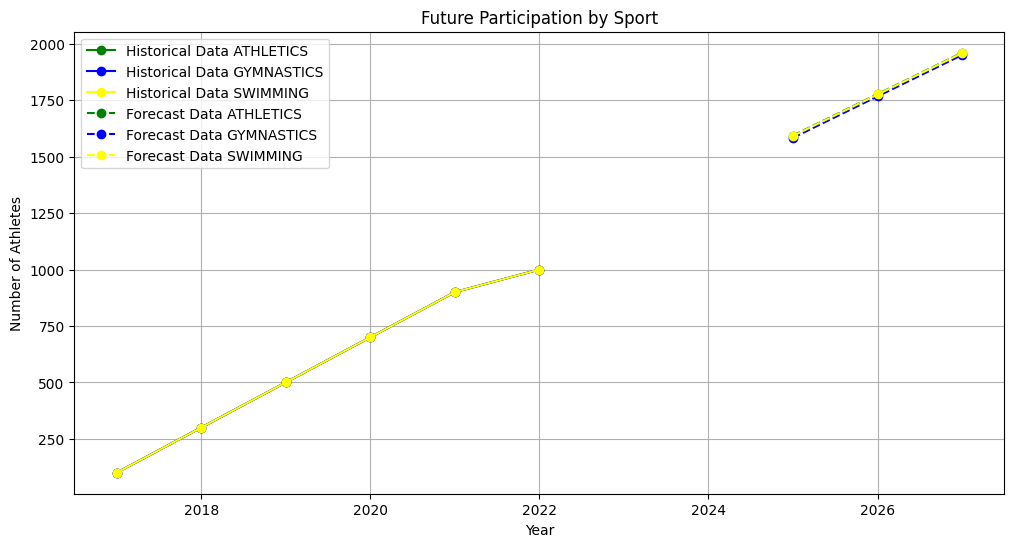

In [ ]:
# 2.Regression Analysis for Athletics, Gymnastics, Swimming
# (identify factors that influence participation rates and predict future trends based on these factors)

# Import the libraries

from sklearn.model_selection import train_test_split # This library will help us split our data into testing and training sets
from sklearn.linear_model import LinearRegression # To implement a linear regression model
from sklearn.metrics import mean_squared_error # For model evaluation
import numpy as np # For data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We will use the same dataframe data_olympics with additional features

data_olympics = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020, 2021, 2022,2017, 2018, 2019, 2020, 2021, 2022,2017, 2018, 2019, 2020, 2021, 2022],
    'Sport':['ATHLETICS','ATHLETICS','ATHLETICS','ATHLETICS','ATHLETICS','ATHLETICS','GYMNASTICS','GYMNASTICS','GYMNASTICS','GYMNASTICS','GYMNASTICS','GYMNASTICS','SWIMMING','SWIMMING', 'SWIMMING','SWIMMING','SWIMMING','SWIMMING'],
    'NOC': ['GRB'] * 18,
    'Athletes': [100, 300, 500, 700, 900, 1000, 100, 300, 500, 700, 900, 1000,100, 300, 500, 700, 900, 1000]
})

# Converting categorical variables 'Sport' and 'Country' to numerical

data_olympics_dummies = pd.get_dummies(data_olympics, columns=['Sport','NOC'])

# Define target variables

x = data_olympics_dummies.drop('Athletes', axis=1) # Dropping the 'Athletes' column as it will be in y axis
y = data_olympics['Athletes']

# Splitting the data into training (x_train, y_train) and testing sets (x_test, y_test)
# Will use 20% of the data for testing
# The random_state is set to 0 and ensures that we could reproduce the model

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Linear Regression Model

model=LinearRegression()
model.fit(x_train, y_train)

# Predict & Evaluate Data

# Makes prediction on the data using the model
y_pred = model.predict(x_test)

# Mean Square Error between the actual values and the predicted ones
mse = mean_squared_error(y_test, y_pred)
root_mse = np.sqrt(mse)
print('Root Mean Square Error (RMSE) of our model is', root_mse)

# Future Data that we would like to make predictions

# Creating a new dataframe to predict participants for the years 2025-2030

future_df = pd.DataFrame({
    'Year':[2025,2026,2027,2025,2026,2027,2025,2026,2027],
    'Sport':['ATHLETICS', 'ATHLETICS','ATHLETICS','GYMNASTICS','GYMNASTICS','GYMNASTICS', 'SWIMMING','SWIMMING','SWIMMING'] ,
    'NOC':['GRB'] * 9
             })

# Converting categorical variables 'Sport' and 'Country' to numerical

future_data_dummies = pd.get_dummies(future_df, columns=['Sport', 'NOC'])

# Align future data with the training data columns
future_data_dummies = future_data_dummies.reindex(columns=x.columns, fill_value=0)

# Predicting future data

pred_future = model.predict(future_data_dummies)

# Visualising the model
plt.figure(figsize = (12,6))

# Historical Data
sports = data_olympics['Sport'].unique() # Getting the unique sports from the column 'Sport' of the database

# Choosing colours for each sport
colors = {'ATHLETICS': 'green', 'GYMNASTICS': 'blue', 'SWIMMING':'yellow'}

for sport in sports:
    sport_data = data_olympics[data_olympics['Sport']== sport]
    plt.plot(sport_data['Year'], sport_data['Athletes'], marker='o', label = f'Historical Data {sport}', color=colors[sport])

# Forecast Data
future_sports = data_olympics['Sport'].unique()

for sport in future_sports:
    future_sport_data = future_df[future_df['Sport']== sport]
    pred_future_sport = model.predict(future_data_dummies[future_df['Sport']== sport])
    plt.plot(future_sport_data['Year'], pred_future_sport, marker='o', linestyle='--',label = f'Forecast Data {sport}', color=colors[sport])

plt.title('Future Participation by Sport')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True)
plt.show()